In [1]:
%load_ext autoreload
%autoreload 2
    
import os 
import sys
from rosbag2_py import SequentialReader, StorageOptions, ConverterOptions
import pandas as pd
import bag_converter
import importlib
importlib.reload(bag_converter)
import matplotlib.pyplot as plt

import cProfile
import pstats

bag_converter = bag_converter.BagConverter()

In [3]:
path = "../bag/pressure_wrench_sample/pressure_wrench_sample_0.db3"

with cProfile.Profile() as pr:
    bag_converter.connectDB(path)
    res1 = bag_converter.getTopicDataWithPandas("/sg/pressure")
    res2 = bag_converter.getTopicDataWithPandas("/sg/wrench")

stats = pstats.Stats(pr)
stats.strip_dirs()
stats.sort_stats("cumtime").print_stats(20)  # 上位20件表示

[INFO] Loaded cache for topic '/sg/wrench' from ../bag/pressure_wrench_sample/sg_wrench.feather
         19004539 function calls (18698281 primitive calls) in 9.910 seconds

   Ordered by: cumulative time
   List reduced from 702 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.004    0.002    9.910    4.955 bag_converter.py:158(getTopicDataWithPandas)
        1    0.751    0.751    9.416    9.416 bag_converter.py:94(_extractDataFromDB)
   348871    0.175    0.000    4.206    0.000 serialization.py:32(deserialize_message)
   348871    1.877    0.000    3.892    0.000 {built-in method rclpy._rclpy_pybind11.rclpy_deserialize}
412871/348871    0.490    0.000    1.976    0.000 message_converter.py:230(convert_ros_message_to_dictionary)
   348871    0.397    0.000    1.282    0.000 bag_converter.py:49(_calcDataTime)
428871/348871    0.596    0.000    0.784    0.000 bag_converter.py:33(__flatten_dict)
   332871    0.410    

/sg/pressure:
  - data
/sg/wrench:
  - header/stamp/secs
  - header/stamp/nsecs
  - header/frame_id
  - wrench/force/x
  - wrench/force/y
  - wrench/force/z
  - wrench/torque/x
  - wrench/torque/y
  - wrench/torque/z
[INFO] Loaded cache for topic '/sg/pressure' from ../bag/pressure_wrench_sample/sg_pressure.csv
[INFO] Loaded cache for topic '/sg/wrench' from ../bag/pressure_wrench_sample/sg_wrench.csv


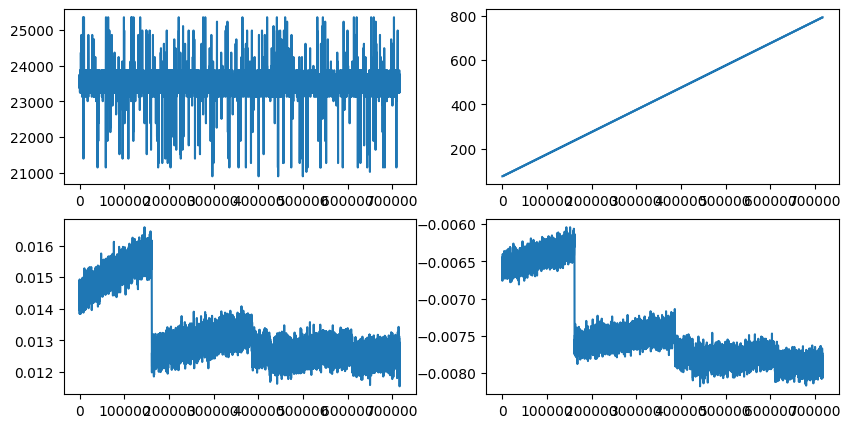

In [73]:
path = "../bag/pressure_wrench_sample/pressure_wrench_sample_0.db3"

bag_converter.connectDB(path)  # 先にDB接続
bag_converter.getAllTopicNameAndMessageType()  # その後にトピック一覧表示

res1 = bag_converter.getTopicDataWithPandas("/sg/pressure")
res2 = bag_converter.getTopicDataWithPandas("/sg/wrench")

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
ax1.plot(res1['msec'].to_numpy(), res1['data'].to_numpy())
ax2.plot(res2['msec'].to_numpy(), res2['header/stamp/secs'].to_numpy())
ax3.plot(res2['msec'].to_numpy(), res2['wrench/torque/x'].to_numpy())
ax4.plot(res2['msec'].to_numpy(), res2['wrench/torque/y'].to_numpy())
plt.show()
